In [5]:
import pandas as pd

# Load the uploaded dataset
file_path = '/content/drive/MyDrive/dataset diperkecil.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows to understand its structure
dataset.head()

,x2,x4,x7,x8,x37,x41,x47,x64,x68,x1
0,48.73215,70.32679,-24.83777,8.76630,26.84939,202.18689,-12.19034,12.59163,-88.37882,2001
1,50.95714,55.81851,-18.54940,-3.27872,28.70107,13.09302,-7.27994,1.75729,-12.14279,2001
2,48.24750,36.29772,-26.21683,5.05097,35.63919,-0.01744,-7.20736,-11.63176,-83.15795,2001
3,50.97020,67.09964,-16.81409,-12.48207,11.20673,28.68782,-15.55296,-4.05003,-47.75605,2001
4,50.54767,92.35066,-19.04928,20.67345,20.84154,51.41086,-9.11273,0.51657,-9.41185,2001


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Basic Info and Statistics
eda_report = dataset.describe().transpose()

# Check for missing values
missing_values = dataset.isnull().sum()

# Display EDA statistics and missing values
eda_report, missing_values

(        count         mean         std         min          25%          50%  \
 x2   515128.0    43.386224    6.067920     1.74900    39.953392    44.257065   
 x4   515128.0     8.658907   35.270848  -301.00506   -11.463037    10.476855   
 x7   515128.0    -9.521505   12.858281   -81.79429   -18.441175   -11.187815   
 x8   515128.0    -2.391041   14.572861  -188.21400   -10.780360    -2.047015   
 x37  515128.0    72.654053  107.918153 -1711.48400    14.478230    56.222440   
 x41  515128.0    23.094897  205.753394 -7882.82324   -69.684438    21.138595   
 x47  515128.0     6.337656   54.977994 -1329.95974   -17.315575     3.957220   
 x64  515128.0    -0.475633   37.678071  -600.09076   -18.716963    -3.296740   
 x68  515128.0     3.156558   99.927003 -1199.00442   -46.434375     2.260245   
 x1   515128.0  1998.396272   10.931651  1922.00000  1994.000000  2002.000000   
 
              75%         max  
 x2     47.833525    61.97014  
 x4     29.766687   322.85143  
 x7     -2.

Columns like x41, x37, and x68 have significantly larger ranges, suggesting potential outliers
and The dataset appears clean with no missing values.

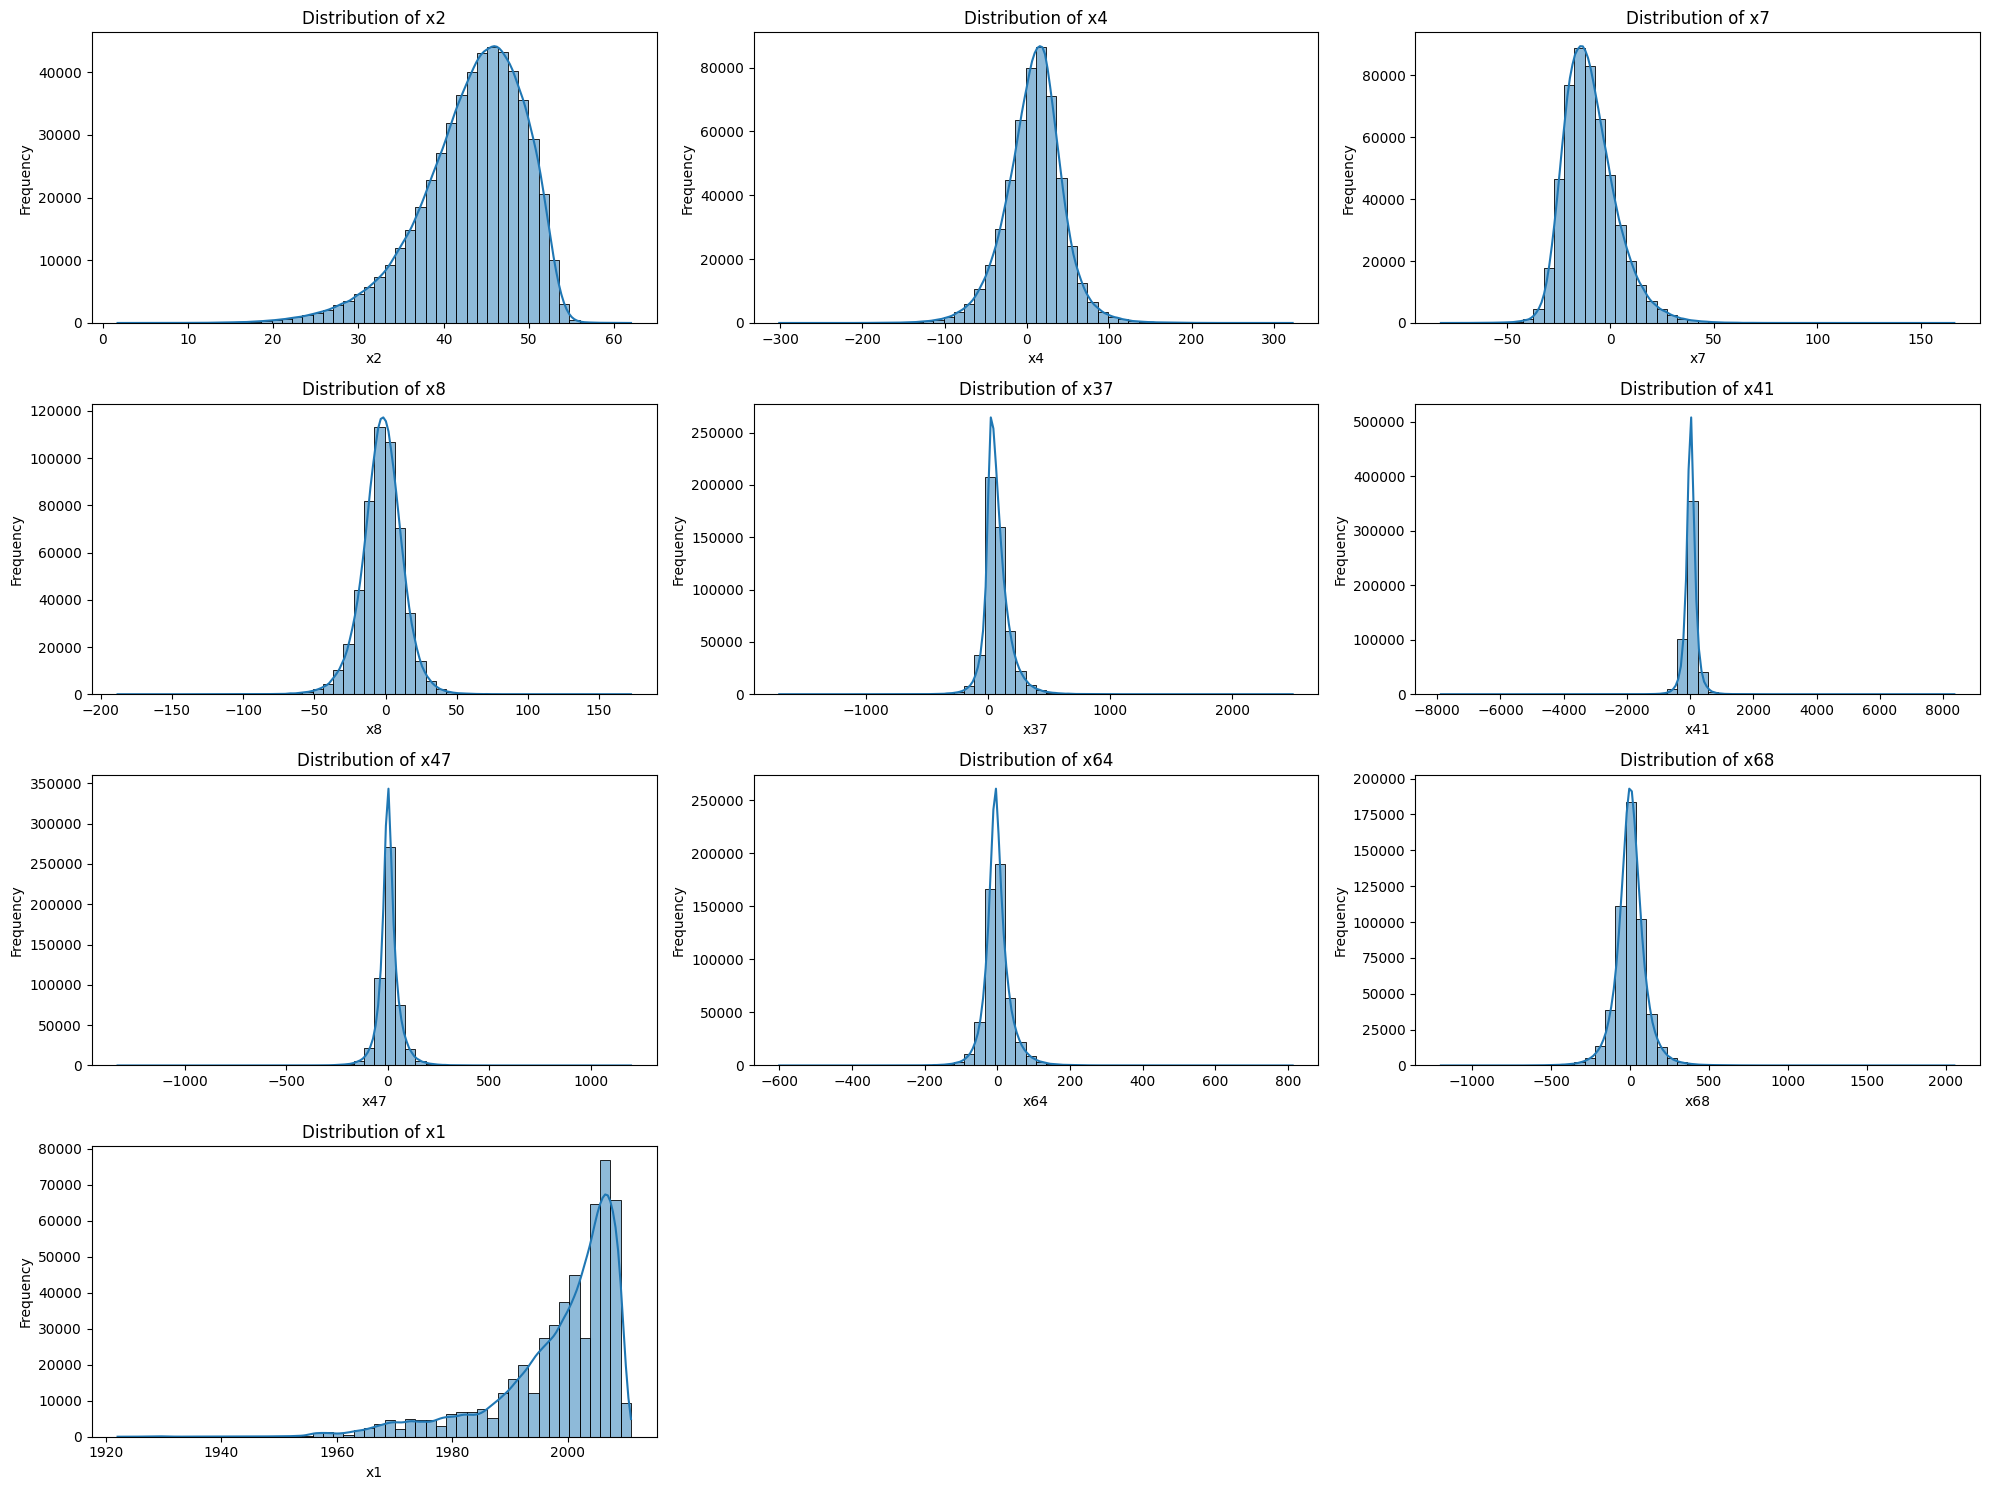

In [8]:
# Visualize the distributions of numerical features
numerical_cols = dataset.columns

plt.figure(figsize=(20, 15))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, idx)
    sns.histplot(dataset[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Most features have near-normal distributions but with notable outliers, particularly in features like x41, x37, and x68 and Features such as x2 and x4 appear more centralized, while others show long tails indicating possible skewness.

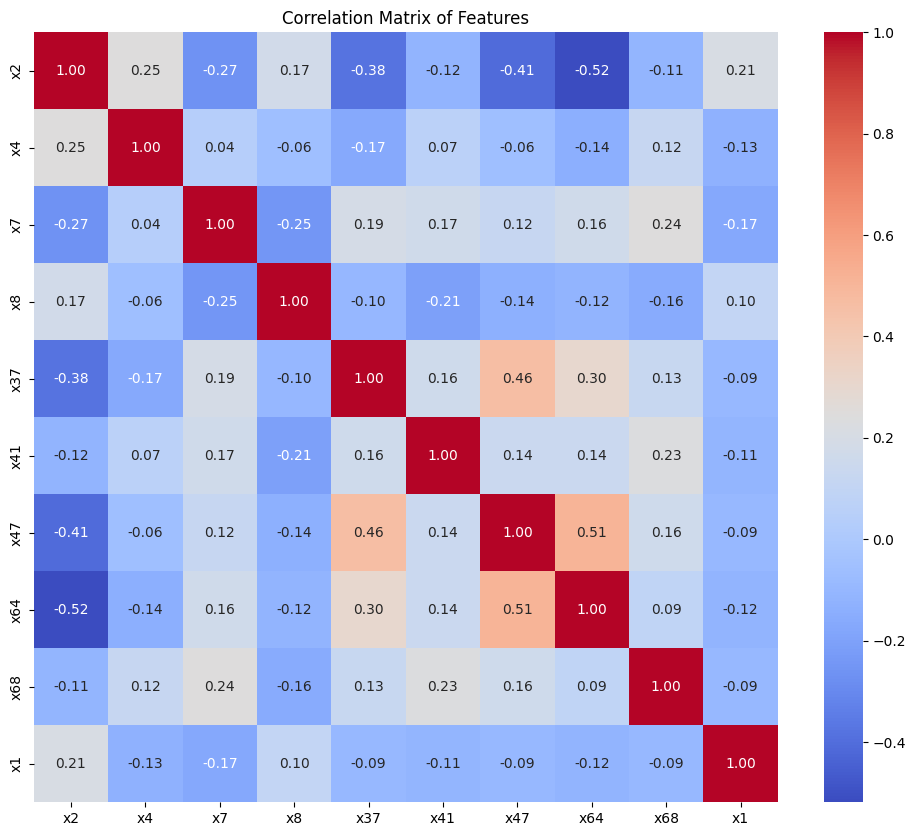

In [9]:
# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

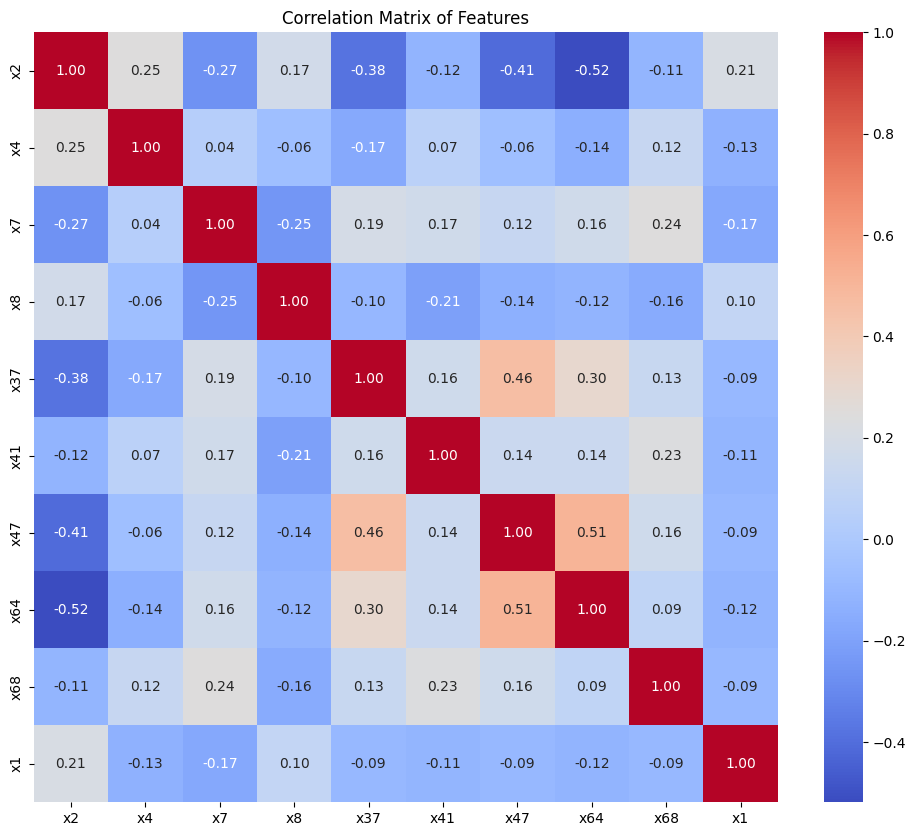

In [10]:
# Retry visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

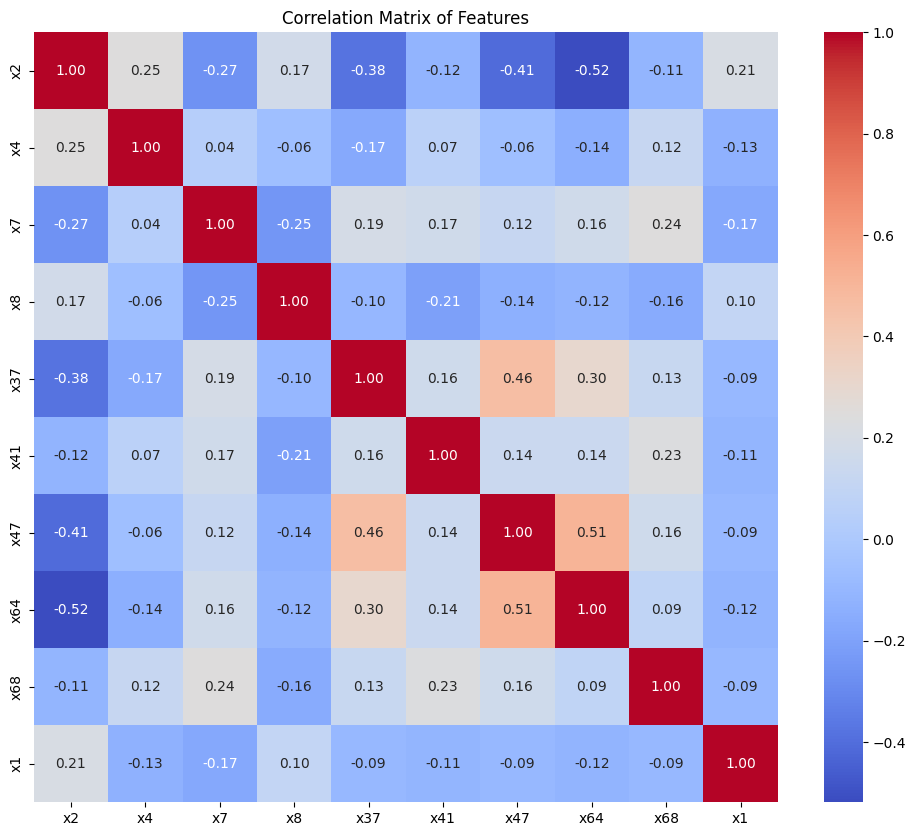

In [11]:
# Recompute the correlation matrix
correlation_matrix = dataset.corr()

# Visualize the correlation matrix again
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

Some features have strong positive or negative correlations, such as:
1.   x41 and x37 showing moderate positive correlation.
2.   x7 and x2 exhibiting slight negative correlation.

These relationships can help guide feature selection and engineering for the regression models.

In [12]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
file_path = '/content/drive/MyDrive/dataset diperkecil.csv'  # Replace with your actual file path
dataset = pd.read_csv(file_path)

# Split dataset into features (X) and target (y)
X = dataset.drop(columns=['x1'])  # Assuming 'x1' is the target column
y = dataset['x1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define pipelines for each model
pipelines = {
    "Polynomial Regression": Pipeline([
        ('poly', PolynomialFeatures()),  # Generates polynomial and interaction features
        ('scaler', StandardScaler()),  # Standardizes the features
        ('model', LinearRegression())  # Linear regression model
    ]),
    "Decision Tree": Pipeline([
        ('model', DecisionTreeRegressor(random_state=42))  # Decision tree model
    ]),
    "k-NN": Pipeline([
        ('scaler', StandardScaler()),  # Standardizes the features
        ('model', KNeighborsRegressor())  # k-NN regressor
    ])
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    "Polynomial Regression": {'poly__degree': [1, 2, 3]},  # Tuning polynomial degree
    "Decision Tree": {'model__max_depth': [5, 10, 20],  # Tuning max depth of the tree
                      'model__min_samples_split': [2, 5, 10]},  # Tuning min samples to split
    "k-NN": {'model__n_neighbors': [3, 5, 10]}  # Tuning number of neighbors
}

# Perform grid search for each model
evaluation_results = []
for model_name, pipeline in pipelines.items():
    # Grid Search
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model
    best_model = grid_search.best_estimator_

    # Predictions
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    evaluation_results.append({
        "Model": model_name,
        "Best Parameters": grid_search.best_params_,
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    })

# Convert results to a DataFrame and print
evaluation_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Results:")
print(evaluation_df)

Model Evaluation Results:
                   Model                                    Best Parameters  \
0  Polynomial Regression                                {'poly__degree': 3}   
1          Decision Tree  {'model__max_depth': 10, 'model__min_samples_s...   
2                   k-NN                         {'model__n_neighbors': 10}   

          MSE       MAE        R²  
0  101.742672  7.432665  0.139487  
1  102.455091  7.379568  0.133461  
2  106.451915  7.558325  0.099657  


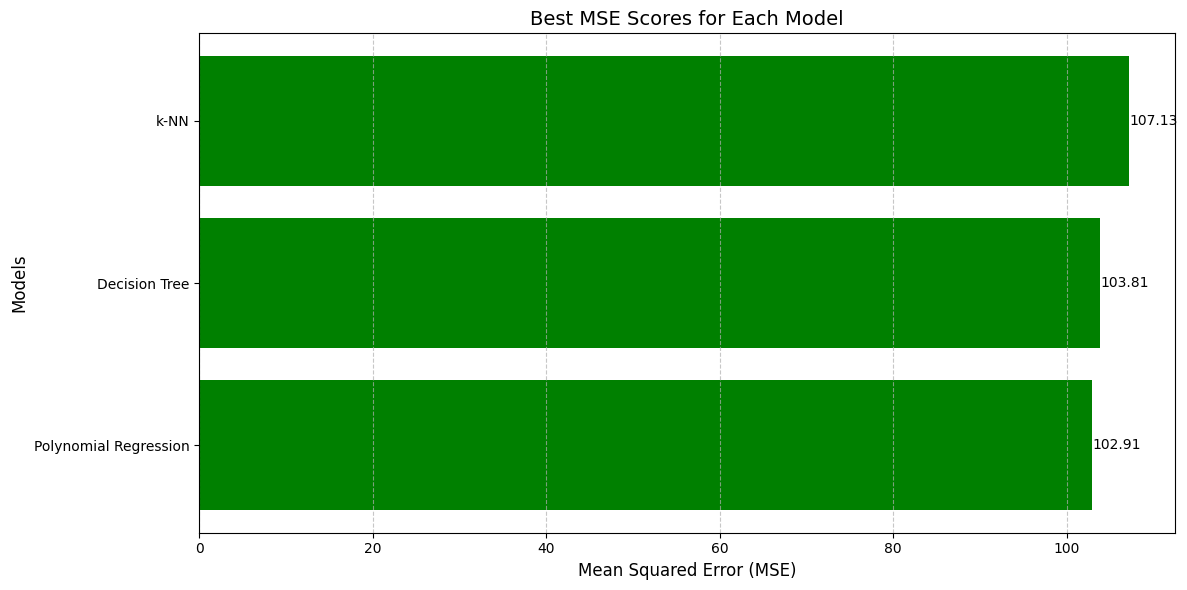

Best Parameters for Each Model:
Polynomial Regression: {'poly__degree': 3}
Decision Tree: {'model__max_depth': 10, 'model__min_samples_split': 10}
k-NN: {'model__n_neighbors': 10}


In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Perform grid search for the remaining models
results = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_  # Convert negative MSE to positive for interpretability
    }

# Prepare data for visualization
models = list(results.keys())
scores = [result['best_score'] for result in results.values()]
best_params = [str(result['best_params']) for result in results.values()]

# Plot results
plt.figure(figsize=(12, 6))
plt.barh(models, scores, color='green')
for i, v in enumerate(scores):
    plt.text(v + 0.1, i, f"{v:.2f}", va='center', fontsize=10)

plt.title('Best MSE Scores for Each Model', fontsize=14)
plt.xlabel('Mean Squared Error (MSE)', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print Best Parameters for Reference
print("Best Parameters for Each Model:")
for model, params in zip(models, best_params):
    print(f"{model}: {params}")

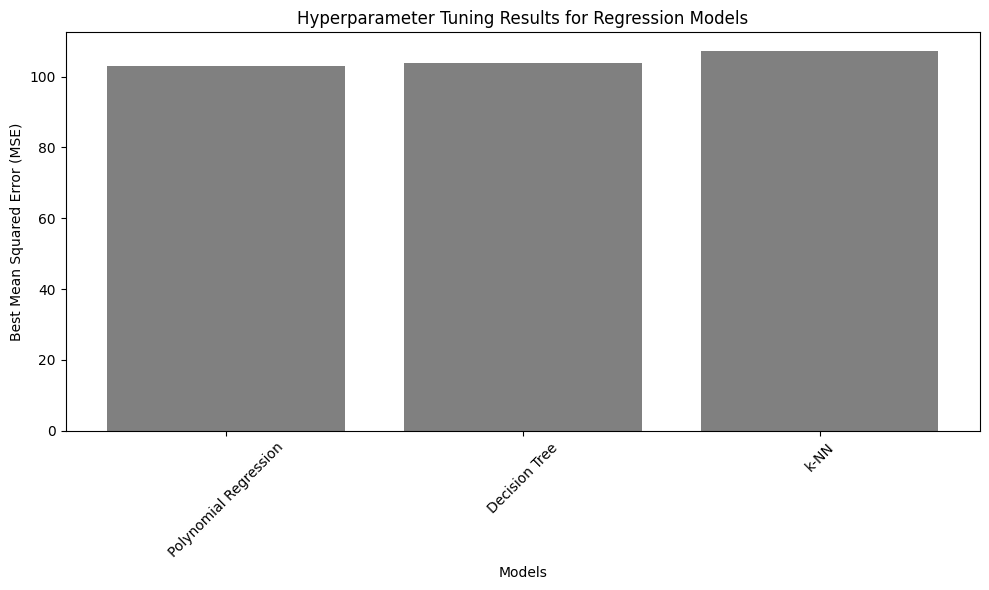

Hyperparameter Tuning Results:
                                                             best_params  \
Polynomial Regression                                {'poly__degree': 3}   
Decision Tree          {'model__max_depth': 10, 'model__min_samples_s...   
k-NN                                          {'model__n_neighbors': 10}   

                       best_score  
Polynomial Regression  102.913726  
Decision Tree          103.808742  
k-NN                   107.130648  


In [14]:
import matplotlib.pyplot as plt

# Perform grid search for the remaining models
results = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_  # Convert negative MSE to positive for interpretability
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).transpose()

# Plotting MSE of models
plt.figure(figsize=(10, 6))
models = results_df.index
mse_values = results_df['best_score']

plt.bar(models, mse_values, color='grey')
plt.xlabel("Models")
plt.ylabel("Best Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning Results for Regression Models")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Print detailed results
print("Hyperparameter Tuning Results:")
print(results_df)

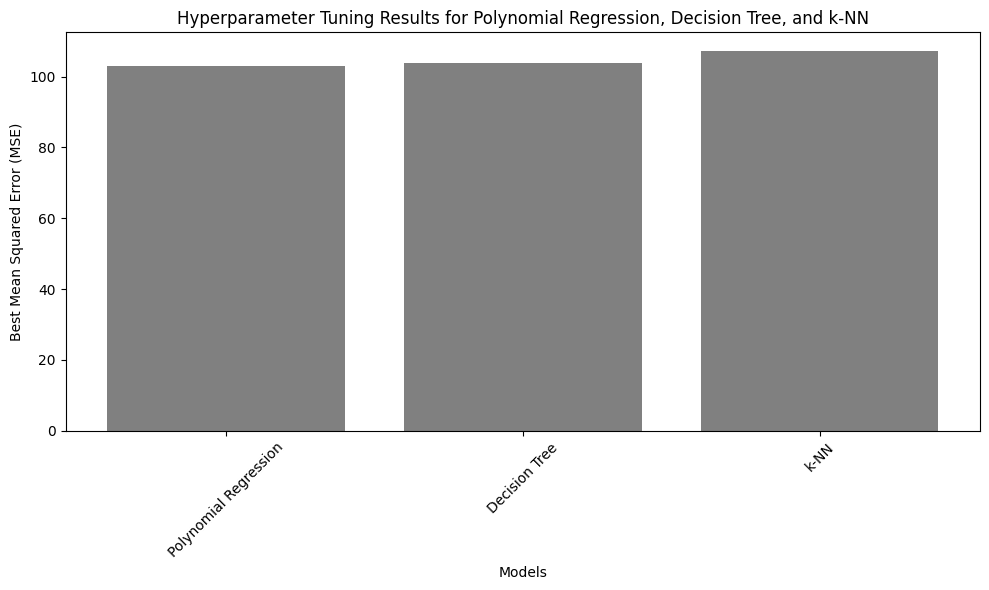

Hyperparameter Tuning Results:
                                                             best_params  \
Polynomial Regression                                {'poly__degree': 3}   
Decision Tree          {'model__max_depth': 10, 'model__min_samples_s...   
k-NN                                          {'model__n_neighbors': 10}   

                       best_score  
Polynomial Regression  102.913726  
Decision Tree          103.808742  
k-NN                   107.130648  


In [15]:
import matplotlib.pyplot as plt

# Redefine train-test split
X = dataset.drop(columns=['x1'])  # Assuming 'x1' is the target column
y = dataset['x1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search for the adjusted models
results = {}
for model_name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_  # Convert negative MSE to positive for interpretability
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).transpose()

# Plot the best scores (MSE) for the models
plt.figure(figsize=(10, 6))
models = results_df.index
mse_values = results_df['best_score']

plt.bar(models, mse_values, color='grey')
plt.xlabel("Models")
plt.ylabel("Best Mean Squared Error (MSE)")
plt.title("Hyperparameter Tuning Results for Polynomial Regression, Decision Tree, and k-NN")
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

# Print detailed results in the console
print("Hyperparameter Tuning Results:")
print(results_df)

In [16]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Helper function to calculate metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

# Polynomial Regression
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
poly_param_grid = {
    'poly__degree': [2, 3, 4],
    'model__fit_intercept': [True, False]
}
poly_grid = GridSearchCV(poly_pipeline, poly_param_grid, cv=5, scoring='neg_mean_squared_error')
poly_grid.fit(X_train, y_train)
poly_best_model = poly_grid.best_estimator_
poly_y_pred = poly_best_model.predict(X_test)
poly_mse, poly_rmse, poly_mae, poly_r2 = evaluate_model(y_test, poly_y_pred)
print("\nBest Polynomial Regression Model Metrics:")
print(f"MSE: {poly_mse:.4f}, RMSE: {poly_rmse:.4f}, MAE: {poly_mae:.4f}, R^2: {poly_r2:.4f}")

# Decision Tree
tree_param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid.fit(X_train, y_train)
tree_best_model = tree_grid.best_estimator_
tree_y_pred = tree_best_model.predict(X_test)
tree_mse, tree_rmse, tree_mae, tree_r2 = evaluate_model(y_test, tree_y_pred)
print("\nBest Decision Tree Model Metrics:")
print(f"MSE: {tree_mse:.4f}, RMSE: {tree_rmse:.4f}, MAE: {tree_mae:.4f}, R^2: {tree_r2:.4f}")

# k-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=5, scoring='neg_mean_squared_error')
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_y_pred = knn_best_model.predict(X_test)
knn_mse, knn_rmse, knn_mae, knn_r2 = evaluate_model(y_test, knn_y_pred)
print("\nBest k-Nearest Neighbors Model Metrics:")
print(f"MSE: {knn_mse:.4f}, RMSE: {knn_rmse:.4f}, MAE: {knn_mae:.4f}, R^2: {knn_r2:.4f}")

# XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, eval_metric='rmse'), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train, y_train)
xgb_best_model = xgb_grid.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_mse, xgb_rmse, xgb_mae, xgb_r2 = evaluate_model(y_test, xgb_y_pred)
print("\nBest XGBoost Model Metrics:")
print(f"MSE: {xgb_mse:.4f}, RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}, R^2: {xgb_r2:.4f}")


Best Polynomial Regression Model Metrics:
MSE: 101.7427, RMSE: 10.0868, MAE: 7.4327, R^2: 0.1395

Best Decision Tree Model Metrics:
MSE: 102.1097, RMSE: 10.1049, MAE: 7.3740, R^2: 0.1364

Best k-Nearest Neighbors Model Metrics:
MSE: 111.5095, RMSE: 10.5598, MAE: 7.7954, R^2: 0.0569

Best XGBoost Model Metrics:
MSE: 97.9025, RMSE: 9.8946, MAE: 7.2119, R^2: 0.1720
